In [1]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [1059]:
train = pd.read_csv('train.csv')
test1 = pd.read_csv('test.csv')

In [5]:
train.shape

(1460, 81)

In [6]:
train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [8]:
print('Id is unique.') if train.Id.nunique() == train.shape[0] else print('oops')

Id is unique.


In [12]:
print('Train and test sets are distinct.') if len(np.intersect1d(train.Id.values, test.Id.values))== 0 else print('oops')

Train and test sets are distinct.


In [69]:
np.array(list(set(train.MSSubClass.unique())))

array([160,  70,  40,  75,  45,  80,  50,  20,  85, 180,  30, 120,  90,
        60, 190])

In [17]:
print('The max and min sales prices are %f seconds' % train.SalePrice.max(), '%f seconds' % train.SalePrice.min())

The max and min sales prices are 755000.000000 seconds 34900.000000 seconds


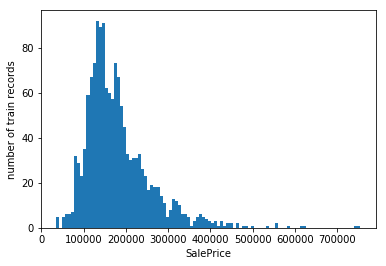

In [22]:
plt.hist(train['SalePrice'].values, bins=100)
plt.xlabel('SalePrice')
plt.ylabel('number of train records')
plt.show()

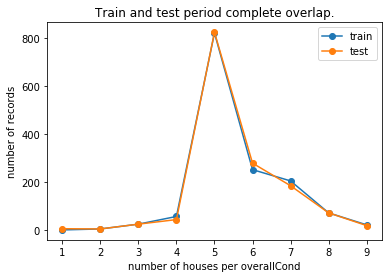

In [25]:

plt.plot(train.groupby('OverallCond').count()[['Id']], 'o-', label='train')
plt.plot(test.groupby('OverallCond').count()[['Id']], 'o-', label='test')
plt.title('Train and test sets complete overlap.')
plt.legend(loc=0)
plt.ylabel('number of records')
plt.xlabel('number of houses per overallCond')
plt.show()

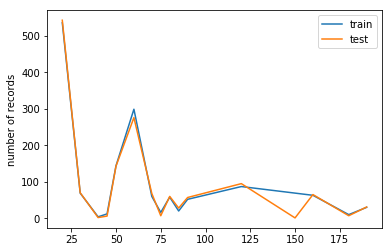

In [73]:
plt.plot(train.groupby('MSSubClass').count()[['Id']], label = 'train')
plt.plot(test.groupby('MSSubClass').count()[['Id']], label = 'test')
plt.legend(loc=0)
plt.ylabel('number of records')
plt.show()

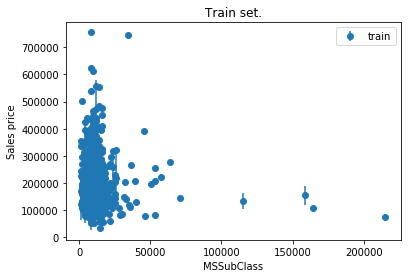

In [536]:
plt.errorbar(np.array(list(set(train.LotArea.unique()))), train.groupby('LotArea').mean()['SalePrice'], yerr = train.groupby('LotArea').std()['SalePrice'], label='train', fmt = 'o')
plt.title('Train set.')
plt.legend(loc=0)
plt.ylabel('Sales price')
plt.xlabel('MSSubClass')
plt.show()

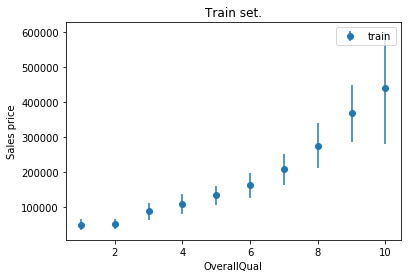

In [513]:
plt.errorbar(np.array(list(set(train.OverallQual.unique()))), train.groupby('OverallQual').mean()['SalePrice'], yerr = train.groupby('OverallQual').std()['SalePrice'], label='train', fmt = 'o')
plt.title('Train set.')
plt.legend(loc=0)
plt.ylabel('Sales price')
plt.xlabel('OverallQual')
plt.show()

In [516]:
from sklearn.utils import shuffle 
# train_shuf = shuffle(train)

In [526]:
train_shuf['OverallQual'].values[:1100].shape

(1100,)

In [645]:
# Fitting Polynomial Regression to the dataset
N = 1100
Xtr = train_shuf[['OverallQual', 'MSSubClass']].values[:N]
ytr = train_shuf['SalePrice'].values.reshape(-1, 1)[:N]
Xts = train_shuf[['OverallQual', 'MSSubClass']].values[N:]
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtr = sc.fit_transform(Xtr)
Xts = sc.transform(Xts)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(Xtr)
poly_reg.fit(X_poly, ytr)
lin_reg = LinearRegression()
lin_reg.fit(X_poly,  ytr)

y_pred = lin_reg.predict(poly_reg.fit_transform(Xts))
error = rmsle(y_pred,train_shuf['SalePrice'].values.reshape(-1, 1)[N:]) 
                         

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


The price is varies directly with the square of the OverallQual

In [646]:
error

0.2407968315170691

In [512]:
train.groupby('OverallQual').count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
OverallQual,,,,,,,,,,,,,,,,,,,,,
1,2,2,2,1,2,2,0,2,2,2,...,2,0,0,0,2,2,2,2,2,2
2,3,3,3,3,3,3,0,3,3,3,...,3,0,0,0,3,3,3,3,3,3
3,20,20,20,17,20,20,3,20,20,20,...,20,0,4,2,20,20,20,20,20,20
4,116,116,116,98,116,116,12,116,116,116,...,116,0,24,7,116,116,116,116,116,116
5,397,397,397,333,397,397,26,397,397,397,...,397,0,123,20,397,397,397,397,397,397
6,374,374,374,282,374,374,21,374,374,374,...,374,3,84,17,374,374,374,374,374,374
7,319,319,319,266,319,319,23,319,319,319,...,319,1,36,7,319,319,319,319,319,319
8,168,168,168,142,168,168,6,168,168,168,...,168,1,8,1,168,168,168,168,168,168
9,43,43,43,42,43,43,0,43,43,43,...,43,0,0,0,43,43,43,43,43,43


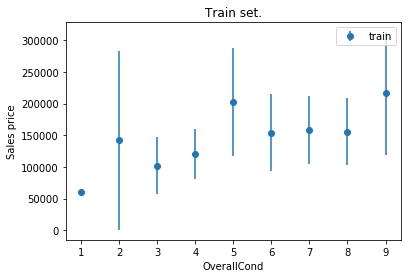

In [92]:
plt.errorbar(np.array(list(set(train.OverallCond.unique()))), train.groupby('OverallCond').mean()['SalePrice'], yerr = train.groupby('OverallCond').std()['SalePrice'], label='train', fmt = 'o')
plt.title('Train set.')
plt.legend(loc=0)
plt.ylabel('Sales price')
plt.xlabel('OverallCond')
plt.show()

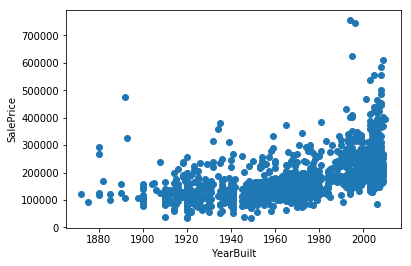

In [648]:
#scatter plot  of price with respect to a numerical quantifiable feature
plt.scatter(train['YearBuilt'], train['SalePrice'])
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.show()

In [647]:
print(train.groupby('OverallCond').count()[['Id']])
print(test.groupby('OverallCond').count()[['Id']])

              Id
OverallCond     
1              1
2              5
3             25
4             57
5            821
6            252
7            205
8             72
9             22
              Id
OverallCond     
1              6
2              5
3             25
4             44
5            824
6            279
7            185
8             72
9             19


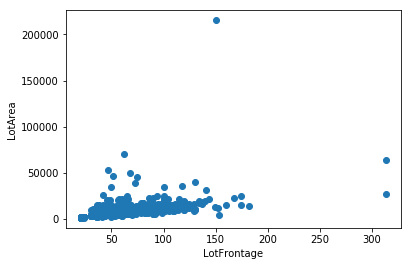

In [344]:
dummies.sort_values(by='LotFrontage')
plt.scatter(dummies['LotFrontage'], dummies['LotArea'])
plt.xlabel('LotFrontage')
plt.ylabel('LotArea')
plt.show()

In [357]:
dummies.sort_values(by = 'LotArea')
dummies.loc[:, 'LotFrontage'] = dummies.LotFrontage.fillna(method = 'bfill')

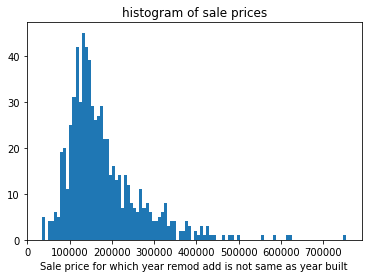

In [113]:
select = np.where(train['YearBuilt'] != train['YearRemodAdd'])[0]

plt.hist(train['SalePrice'][select], bins = 100)
plt.xlabel('Sale price for which year remod add is not same as year built')
plt.title('histogram of sale prices')
plt.show()
# plt.hist(train['SalePrice'], bins = 100)

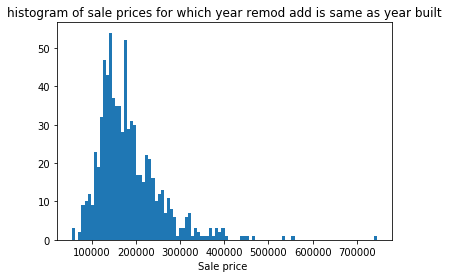

In [115]:
select = np.where(train['YearBuilt'] == train['YearRemodAdd'])[0]

plt.hist(train['SalePrice'][select], bins = 100)
plt.xlabel('Sale price ')
plt.title('histogram of sale prices for which year remod add is same as year built')
plt.show()

It seems that modified houses don't have much different prices than unmodified ones

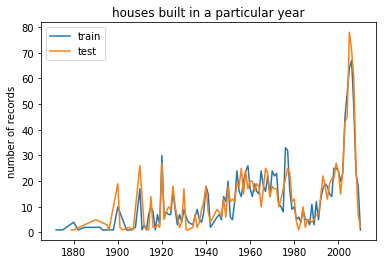

In [117]:
plt.plot(train.groupby('YearBuilt').count()[['Id']], label = 'train')
plt.plot(test.groupby('YearBuilt').count()[['Id']], label = 'test')
plt.legend(loc=0)
plt.ylabel('number of records')
plt.title('houses built in a particular year')
plt.show()

In [101]:
train.shape

(1460, 82)

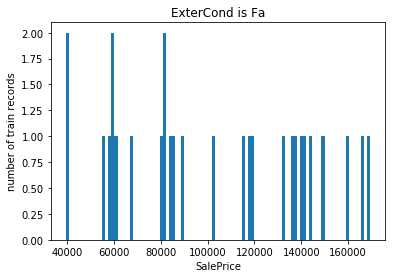

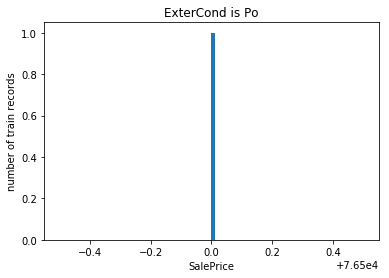

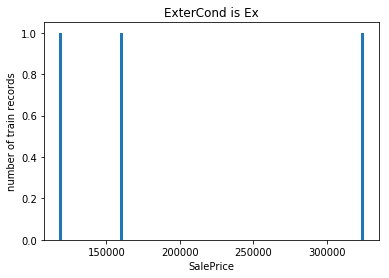

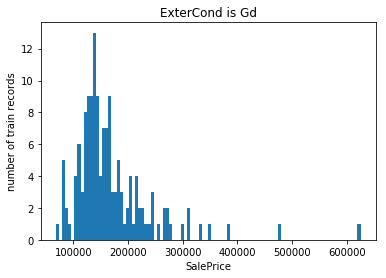

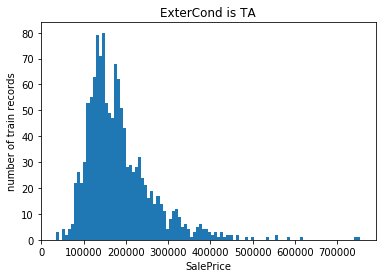

In [87]:
plt.close()
exter_conditions = set(train.ExterCond.unique())
# fig, ax = plt.subplots(ncols=2, nrows = 2)
for  e  in  exter_conditions:
    plt.hist(train.groupby('ExterCond').get_group(e)['SalePrice'].values, bins=100, label=e)
    plt.xlabel('SalePrice')
    plt.ylabel('number of train records')
    plt.title('ExterCond is {}'.format( e))
    plt.show()

In [656]:
num_cols = train.select_dtypes(exclude = ['object'])
str_cols = train.select_dtypes(include = ['object'])

In [660]:
str_cols.loc[:, 'Id'] = num_cols['Id'].values
str_cols.loc[:, 'SalePrice'] = num_cols['SalePrice'].values

/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


In [1020]:
for col in ['KitchenQual_num']:
    test.loc[:, col] = test.loc[:, col].fillna(1)

In [1015]:
check_null(num_cols)

[]

In [1062]:
check_null(test)

['Utilities', 'Exterior1st', 'KitchenQual']

In [1022]:
test['KitchenQual_num'].unique()

array([ 3.,  4.,  5.,  2.,  1.])

In [1348]:
str_cols.to_csv('str_cols.csv', index=False)
num_cols.to_csv('num_cols.csv', index=False)
test.to_csv('test_mod.csv', index=False)

In [982]:
np.isnan(num_cols['LotFrontage']).any()

True

In [1053]:
len(num_cols.dtypes)

55

In [1064]:
def fill_missing(colx, value):
    str_cols.loc[:, colx] = str_cols.loc[:, colx].fillna(value)
    test.loc[:, colx] = test.loc[:, colx].fillna(value)

for col in [['MSZoning','Exterior1st','Exterior2nd','Functional', 'SaleType']]:
    fill_missing(col, 'missing')

/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [1098]:
unique = set()
for col in ['Exterior1st', 'Exterior2nd']:
    for x in str_cols[col].unique():
        unique.add(x)
    for y in test[col].unique():
        unique.add(y)
    for z in unique:
        for i in range(str_cols.shape[0]):
            str_cols.loc[i, 'Exterior'+'_'+z] = 1 if str_cols.loc[i, col] == z else 0
        for i in range(test.shape[0]):
            test.loc[i, 'Exterior'+'_'+z] = 1 if test.loc[i, col] == z else 0
        
    
unique = set()
for col in ['BsmtFinType2', 'BsmtFinType1']:
    for x in str_cols[col].unique():
        unique.add(x)
    for y in test[col].unique():
        unique.add(y)
    for z in unique:
        for i in range(str_cols.shape[0]):
            str_cols.loc[i, 'BsmtFinType'+'_'+z] = 1 if str_cols.loc[i, col] == z else 0
        for i in range(test.shape[0]):
            test.loc[i, 'BsmtFinType'+'_'+z] = 1 if test.loc[i, col] == z else 0

unique = set()
for col in ['Condition1', 'Condition2']:
    for x in str_cols[col].unique():
        unique.add(x)
    for y in test[col].unique():
        unique.add(y)
    for z in unique:
        for i in range(str_cols.shape[0]):
            str_cols.loc[i, 'Condition'+'_'+z] = 1 if str_cols.loc[i, col] == z else 0
        for i in range(test.shape[0]):
            test.loc[i, 'Condition'+'_'+z] = 1 if test.loc[i, col] == z else 0

In [ ]:

for pair in [['MSZoning'],\
            ['Street'], ['Alley'], ['LotShape'], ['LandContour'], ['LotConfig'],['LandSlope'], ['Neighborhood'], \
            ['BldgType'], ['HouseStyle'], ['RoofStyle'], ['RoofMatl'], ['MasVnrType'], ['Foundation'], ['Heating'],\
            ['HeatingQC'], ['CentralAir'], ['Functional'], ['PavedDrive'], \
            ['MiscFeature'], ['SaleType'], ['SaleCondition']]:
    unique = set()
    for col in pair:
        for x in str_cols[col].unique():
            unique.add(x)
        for y in test[col].unique():
            unique.add(y)
    for z in unique:
#         for i in range(str_cols.shape[0]):
#             str_cols.loc[i, col+'_'+z] = 1 if str_cols.loc[i, col] == z else 0
#         for i in range(test.shape[0]):
#             test.loc[i, col+'_'+z] = 1 if test.loc[i, col] == z else 0
#         num_cols.loc[:, col+'_'+z] = str_cols[col+'_'+z].values
        
        

In [1225]:
remove_num = []
remove_test = []

for col in test.columns:
    if num_cols[col].sum(axis=0) < 8 and test[col].sum(axis=0) < 8:
        remove_num.append(col) 
        remove_test.append(col) 

In [1226]:
remove = set()
for a in remove_num:
    remove.add(a)
for b in remove_test:
    remove.add(b)
remove = set(remove_num).intersection(remove_test)
# set(remove_num) set(remove_test)

In [1227]:
len(remove)

25

In [1320]:
features_filtered = set(features) - set(remove)

In [1321]:
len(features) - len(features_filtered)

25

In [1119]:
features = list(num_cols)

In [1120]:
# take only those columns from test that are present in num_cols
features = list(filter(lambda x: x!= 'SalePrice', features))
test = test[features]

In [1178]:
'Utilities' in test

False

In [1180]:
num_cols_filt = num_cols[list(features_filtered)]
test_filt = test[list(features_filtered)]

In [1181]:
num_cols_filt.to_csv('num_cols_filt.csv')
test_filt.to_csv('test_filt.csv')

In [1144]:
remove_num = a.keys

In [1148]:
a = num_cols['Functional_missing'].sum(axis=0)
# a.where(a<8)

In [1149]:
a

0.0

In [ ]:
remove = 'Utilities', 'SaleType_Oth', 'SaleType_Con'

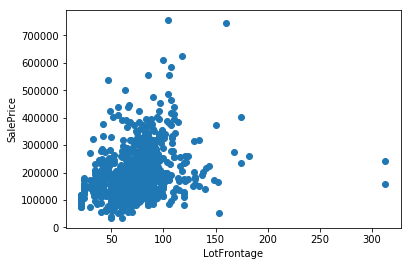

In [958]:
colx = 'LotFrontage'
plt.scatter( num_cols[ colx], num_cols['SalePrice'])
plt.xlabel(colx)
plt.ylabel('SalePrice')
plt.show()

In [987]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# num_cols_sc = sc.fit_transform(unans(num_cols).values)
# Xts = sc.transform(Xts)
print(pd.DataFrame(num_cols_sc, columns = list(num_cols)).cov())

                        Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id                1.000833    0.009523    -0.010610 -0.038313    -0.039298   
MSSubClass        0.009523    1.000833    -0.386669 -0.201492     0.007251   
LotFrontage      -0.010610   -0.386669     1.000833  0.426450     0.251855   
LotArea          -0.038313   -0.201492     0.426450  1.000833     0.182316   
OverallQual      -0.039298    0.007251     0.251855  0.182316     1.000833   
OverallCond       0.007465   -0.055042    -0.059263 -0.037020    -0.127579   
YearBuilt        -0.011688   -0.003322     0.123452  0.049691     0.588878   
YearRemodAdd     -0.024101    0.008885     0.088940  0.038910     0.561944   
MasVnrArea       -0.070731    0.027603     0.192571  0.114928     0.427058   
BsmtFinSF1       -0.011524   -0.068883     0.233828  0.233213     0.268753   
BsmtFinSF2        0.012041   -0.058703     0.049941  0.138265    -0.057189   
BsmtUnfSF        -0.011396   -0.153050     0.132754  0.022164   

In [1002]:
unans = lambda df: df[df.isnull().any(axis=1)]
unans(test)['MSZoning']


95       RL
231      RL
246      FV
422      RL
455     NaN
485      RL
532      RL
544      RL
581      FV
660      RM
691      RL
728      RL
756     NaN
790     NaN
851      RL
865      RL
880      RL
889      FV
908      FV
1013     RM
1029     RL
1116     RM
1132     RL
1150     RL
1197     RL
1226     RL
1402     RL
1444    NaN
Name: MSZoning, dtype: object

In [1045]:
# imputing
test.loc[:, 'Exterior1st'] = test['Exterior1st'].replace(to_replace = ['AsphShn', 'ImStucc', 'CBlock'], value = ['missing', 'missing', 'missing'])
str_cols.loc[:, 'Exterior1st'] = str_cols['Exterior1st'].replace(to_replace = ['AsphShn', 'ImStucc', 'CBlock'], value = ['missing', 'missing', 'missing'])

/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [1060]:
test.loc[:, 'Exterior1st'] = test1['Exterior1st']

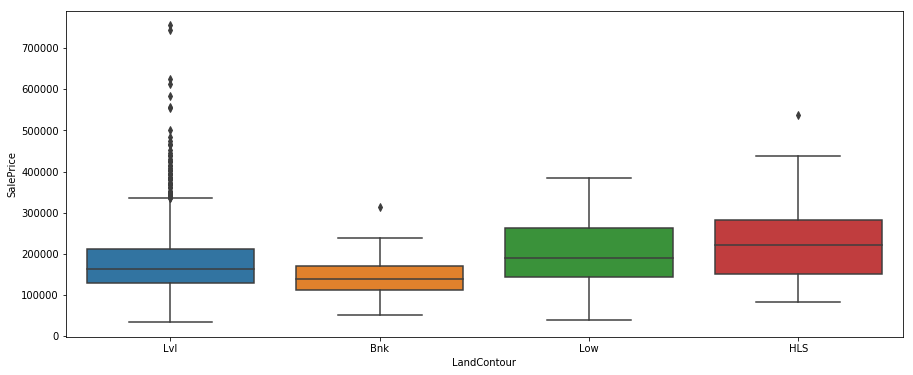

In [1380]:
import seaborn as sb
colx = 'LandContour'
# print (test[colx].unique())
fig, ax = plt.subplots(figsize=(15,6))
sb.boxplot(x=colx, y="SalePrice", ax=ax, data=train[[colx, 'SalePrice']]);

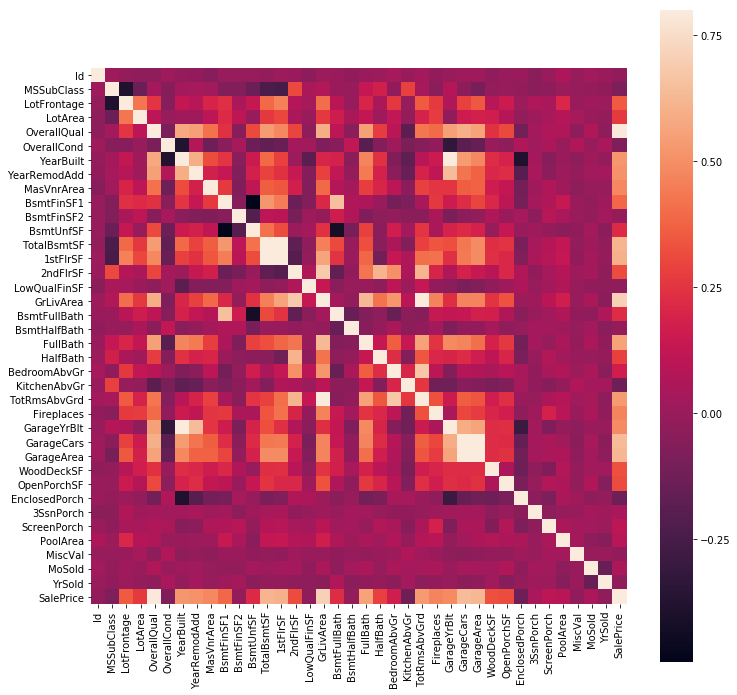

In [1388]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 12))
sb.heatmap(corrmat, vmax=.8, square=True);

In [971]:
coly = 'BsmtCond'
print(list(test[coly].unique()))
print(list(str_cols[coly].unique()))
print(num_cols[coly+'_num'].unique())

['TA', 'Po', 'Fa', 'Gd', 'missing']
['TA', 'Gd', 'missing', 'Fa', 'Po']
[3 4 0 2 1]


In [997]:
# replace the Bsmt qual values to a integers
import math
for coly in ['ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual']:
    num_cols.loc[:, coly+'_num'] = str_cols[coly].replace(to_replace = ['missing', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],\
                                                          value = [0,1,2,3,4,5])
    test.loc[:, coly+'_num'] = test[coly].replace(to_replace=  ['missing', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],\
                                                          value = [0,1,2,3,4,5])


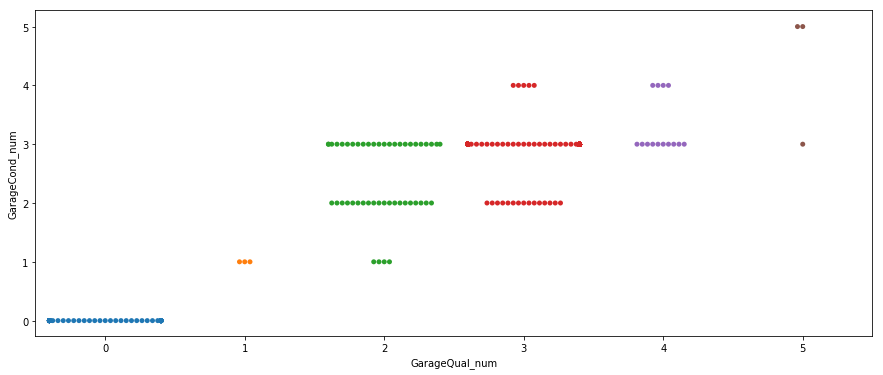

In [1389]:
colx = ''
# print (test[colx].unique())
fig, ax = plt.subplots(figsize=(15,6))
# sb.boxplot(x=colx, y="SalePrice", ax=ax, data=train[[colx, 'SalePrice']]);
sb.swarmplot(x="GarageQual_num", y="GarageCond_num", data=num_cols[['GarageQual_num', 'GarageCond_num' ]]);

In [ ]:
plt.close()
colx = ''
plt.errorbar(np.arange(len(list(str_cols[colx].unique()))), str_cols.groupby(colx).mean()['SalePrice'], yerr = str_cols.groupby(colx).std()['SalePrice'], label='train', fmt = 'o')
plt.title('Train set')
plt.legend(loc=0)
plt.ylabel('Sales price')
plt.xlabel(colx)
plt.show()


In [596]:
train['Condition1'].unique()

array(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
       'RRNe'], dtype=object)

In [643]:
# transactions = []
# for i in range(train.shape[0]):
#     transactions.append(list(train[['Neighborhood', 'Condition1', 'Condition2']].values[i]))

# Training Apriori on the dataset
from apyori import apriori
rules = apriori(transactions, min_support = 10/1460, min_confidence = 0.4, min_lift = 1, min_length = 2)

In [ ]:
plt.close()
colx = 'Neighborhood'

plt.scatter()
plt.title('Train set.')
plt.legend(loc=0)
plt.ylabel('Sales price')
plt.xlabel(colx)
plt.show()



In [546]:
train.groupby('ExterCond').get_group('Po')
train.loc[train.ExterCond == 'Po', 'ExterCond'] = 'Fa'


In [ ]:
test.loc[test.ExterCond == 'Po', 'ExterCond'] = 'Fa'

In [508]:
train.groupby('ExterCond').mean()['SalePrice']

ExterCond
Ex    201333.333333
Fa    102595.142857
Gd    168897.568493
Po     76500.000000
TA    184034.896256
Name: SalePrice, dtype: float64

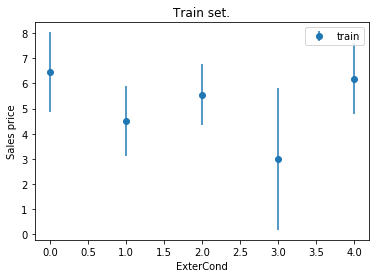

In [504]:
plt.errorbar(np.arange(len(list(test.ExterCond.unique()))), test.groupby('ExterCond').mean()['OverallQual'], yerr = test.groupby('ExterCond').std()['OverallQual'], label='train', fmt = 'o')
plt.title('Train set.')
plt.legend(loc=0)
plt.ylabel('Sales price')
plt.xlabel('ExterCond')
plt.show()

In [56]:
plt.close()
exter_conditions = set(test.ExterCond.unique())
for e in exter_conditions:
    print(test.groupby('ExterCond').get_group(e).shape[0], 'in group ', e)

39 in group  Fa
2 in group  Po
9 in group  Ex
153 in group  Gd
1256 in group  TA


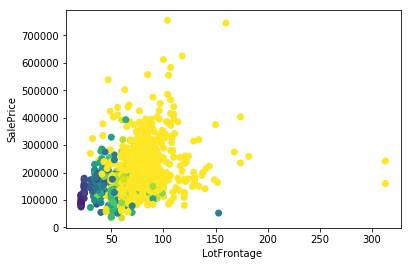

In [130]:
plt.scatter(train['LotFrontage'].values, train['SalePrice'].values, c = train['LotArea'].values*255/train['LotArea'].max(), vmin=1, vmax=10)
plt.xlabel('LotFrontage ')
plt.ylabel('SalePrice')
plt.show()

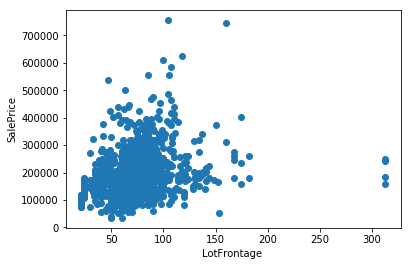

In [1253]:
plt.scatter(num_cols['LotFrontage'].values, num_cols['SalePrice'].values)
plt.xlabel('LotFrontage ')
plt.ylabel('SalePrice')
plt.show()

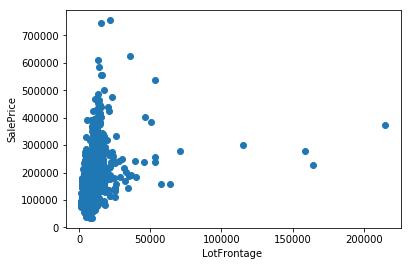

In [1254]:
plt.scatter(num_cols['LotArea'].values, num_cols['SalePrice'].values)
plt.xlabel('LotFrontage ')
plt.ylabel('SalePrice')
plt.show()

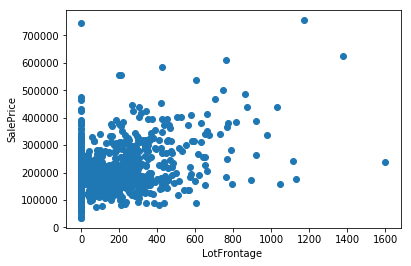

In [1255]:
plt.scatter(num_cols['MasVnrArea'].values, num_cols['SalePrice'].values)
plt.xlabel('LotFrontage ')
plt.ylabel('SalePrice')
plt.show()

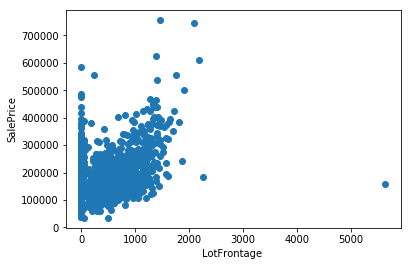

In [1256]:
plt.scatter(num_cols['BsmtFinSF1'].values, num_cols['SalePrice'].values)
plt.xlabel('LotFrontage ')
plt.ylabel('SalePrice')
plt.show()

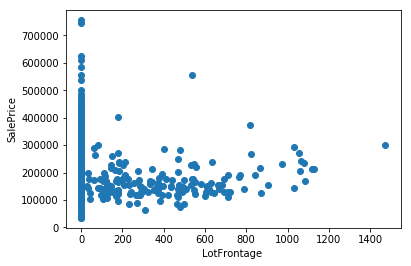

In [1257]:
plt.scatter(num_cols['BsmtFinSF2'].values, num_cols['SalePrice'].values)
plt.xlabel('LotFrontage ')
plt.ylabel('SalePrice')
plt.show()

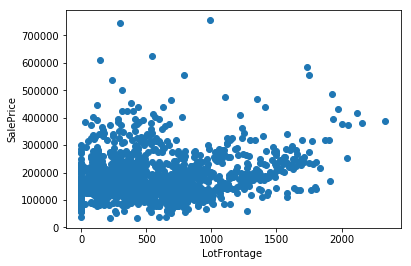

In [1258]:
plt.scatter(num_cols['BsmtUnfSF'].values, num_cols['SalePrice'].values)
plt.xlabel('LotFrontage ')
plt.ylabel('SalePrice')
plt.show()

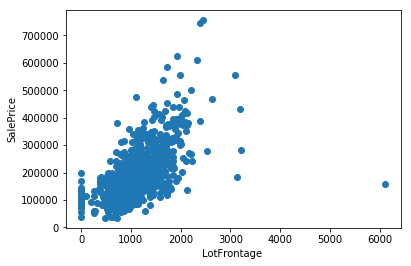

In [1259]:
plt.scatter(num_cols['TotalBsmtSF'].values, num_cols['SalePrice'].values)
plt.xlabel('LotFrontage ')
plt.ylabel('SalePrice')
plt.show()

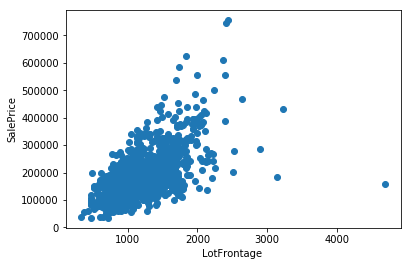

In [1262]:
plt.scatter(num_cols['1stFlrSF'].values, num_cols['SalePrice'].values)
plt.xlabel('LotFrontage ')
plt.ylabel('SalePrice')
plt.show()

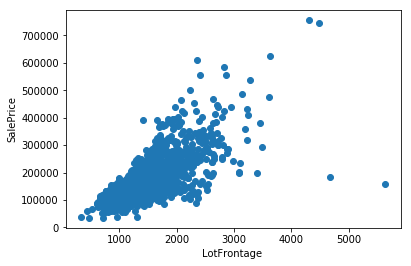

In [1264]:
plt.scatter(num_cols['GrLivArea'].values, num_cols['SalePrice'].values)
plt.xlabel('LotFrontage ')
plt.ylabel('SalePrice')
plt.show()

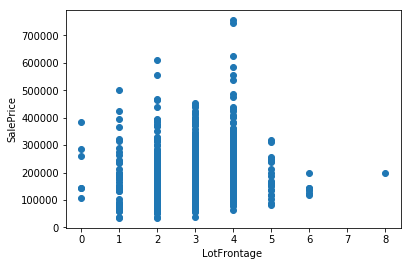

In [1266]:
plt.scatter(num_cols['BedroomAbvGr'].values, num_cols['SalePrice'].values)
plt.xlabel('LotFrontage ')
plt.ylabel('SalePrice')
plt.show()

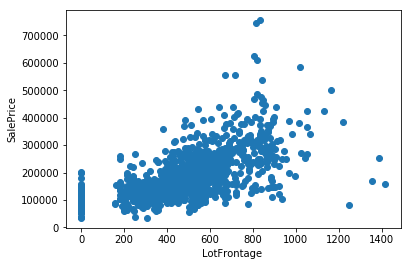

In [1267]:
plt.scatter(num_cols['GarageArea'].values, num_cols['SalePrice'].values)
plt.xlabel('LotFrontage ')
plt.ylabel('SalePrice')
plt.show()

In [159]:
len(train.groupby(gby_cols).groups)

18

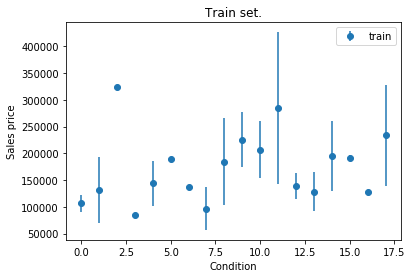

In [161]:
gby_cols= ['Condition1', 'Condition2']
plt.errorbar(np.arange(len(train.groupby(gby_cols).groups)), train.groupby(gby_cols).mean()['SalePrice'].values, yerr = train.groupby(gby_cols).std()['SalePrice'], label='train', fmt = 'o')
plt.title('Train set.')
plt.legend(loc=0)
plt.ylabel('Sales price')
plt.xlabel('Condition')
plt.show()

In [666]:
def check_null(train):
    l = []
    for f in train.columns:
        if pd.isnull(train[f]).any():
            l.append(f)
    return l

In [330]:
dummies = pd.get_dummies(train, drop_first = True, sparse = False)

In [331]:
dummies_test = pd.get_dummies(test, drop_first = True, sparse = False)

In [265]:
print('no missing value') if dummies.count().min() == dummies.shape[0] and dummies_test.count().min() == dummies_test.shape[0] else print('oops')

oops


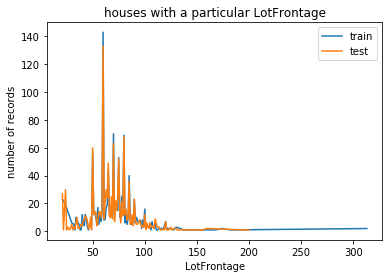

In [284]:
plt.close()
plt.plot(train.groupby('LotFrontage').count()[['Id']], label = 'train')
plt.plot(test.groupby('LotFrontage').count()[['Id']], label = 'test')
plt.legend(loc=0)
plt.xlabel('LotFrontage')
plt.ylabel('number of records')
plt.title('houses with a particular LotFrontage')
plt.show()

In [361]:
dummies.loc[:, 'MasVnrArea'] = dummies.MasVnrArea.fillna(0.0)

In [440]:
for f in dummies_test.columns:

    if pd.isnull(dummies_test[f]).any():
        print(f)
        dummies_test.loc[:, f] = dummies_test[f].fillna(0.0)

In [437]:
dummies.loc[:, 'GarageYrBlt'] = dummies.GarageYrBlt.fillna(0.0)

In [364]:
dummies_test.sort_values(by = 'LotArea')
dummies_test.loc[:, 'LotFrontage'] = dummies_test.LotFrontage.fillna(method = 'bfill')

In [367]:
dummies_test.loc[:, 'MasVnrArea'] = dummies_test.MasVnrArea.fillna(0.0)

In [379]:
dummies = dummies.sort_values(by = 'Id')

In [414]:
train['GarageType'].unique()

array(['Attchd', nan, 'BuiltIn', 'Detchd', 'Basment', '2Types', 'CarPort'], dtype=object)

In [415]:
cols = list(dummies.columns)

In [433]:
train.groupby('GarageYrBlt')

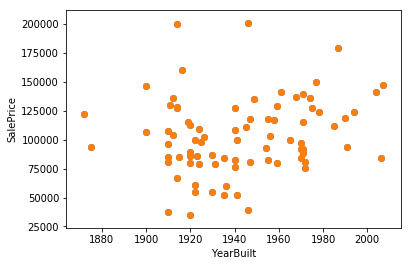

In [434]:
# dummies.sort_values(by='GarageYrBlt')
plt.scatter(dummies['YearBuilt'].where(pd.isnull(dummies['GarageYrBlt'])), dummies['SalePrice'].where(pd.isnull(dummies['GarageYrBlt'])))
plt.scatter(train['YearBuilt'].where(pd.isnull(train['GarageYrBlt'])), train['SalePrice'].where(pd.isnull(train['GarageType'])))
plt.ylabel('SalePrice')
plt.xlabel('YearBuilt')
plt.show()

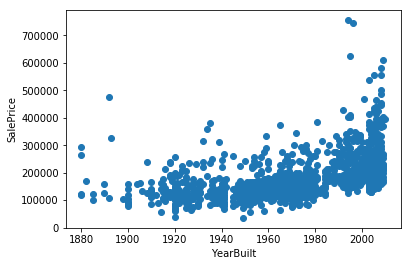

In [435]:
# dummies.sort_values(by='GarageYrBlt')
plt.scatter(dummies['YearBuilt'].where(pd.notnull(dummies['GarageYrBlt'])), dummies['SalePrice'].where(pd.notnull(dummies['GarageYrBlt'])))
# plt.scatter(train['YearBuilt'], train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('YearBuilt')
plt.show()

In [1188]:
test_filt.columns

Index(['SaleType_ConLI', 'Neighborhood_Blueste', 'SaleCondition_Alloca',
       'SaleType_Oth', 'Neighborhood_SWISU', 'TotalBsmtSF', 'MasVnrArea',
       'Neighborhood_BrkSide', 'MasVnrType_BrkFace', 'Heating_Grav',
       ...
       'HeatingQC_Fa', 'GarageQual_num', 'GarageCars', 'LandContour_Low',
       'WoodDeckSF', 'LotShape_IR1', 'RoofStyle_Flat', 'LotConfig_FR2',
       'BsmtFinType1_num', 'Fireplaces'],
      dtype='object', length=171)

In [1189]:
num_cols_filt.columns

Index(['SaleType_ConLI', 'Neighborhood_Blueste', 'SaleCondition_Alloca',
       'SaleType_Oth', 'Neighborhood_SWISU', 'TotalBsmtSF', 'MasVnrArea',
       'Neighborhood_BrkSide', 'MasVnrType_BrkFace', 'Heating_Grav',
       ...
       'HeatingQC_Fa', 'GarageQual_num', 'GarageCars', 'LandContour_Low',
       'WoodDeckSF', 'LotShape_IR1', 'RoofStyle_Flat', 'LotConfig_FR2',
       'BsmtFinType1_num', 'Fireplaces'],
      dtype='object', length=171)

In [1296]:
train = pd.read_csv('train.csv')

In [1334]:
'BsmtFinType1' in num_cols.columns

False

In [1336]:
# remove the basmt fin sf area columns, instead put the areas under the various bsmtFintType_.. headings
for col in ['BsmtFinType1_num', 'BsmtFinType2_num']:
    
    num_cols.loc[:, col] = num_cols.loc[:, col]*train.loc[:, 'BsmtFinSF1'] if col == 'BsmtFinType1_num' else train.loc[:,'BsmtFinSF1']
    test.loc[:,col] = test.loc[:, col]*test1.loc[:, 'BsmtFinSF1'] if col == 'BsmtFinType1_num' else test1.loc[:,'BsmtFinSF2'] 


/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [1337]:
test.drop( ['BsmtFinType_GLQ','BsmtFinType_ALQ', 'BsmtFinType_Unf', 'BsmtFinType_Rec', 'BsmtFinType_BLQ', 'BsmtFinType_missing', 'BsmtFinType_LwQ'], axis=1, inplace = True)
num_cols.drop(['BsmtFinType_GLQ','BsmtFinType_ALQ', 'BsmtFinType_Unf', 'BsmtFinType_Rec', 'BsmtFinType_BLQ', 'BsmtFinType_missing', 'BsmtFinType_LwQ'], axis=1, inplace = True)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1378]:
'LandSlope' in list(test)

False

In [1306]:
np.array(num_cols['BsmtFinType_GLQ'])

array([ 706.,   nan,  486., ...,  275.,   49.,   nan])

In [1343]:
features_filtered = set(num_cols) - remove - set(['SalePrice'])

In [1354]:
# check_null(num_cols)
check_null(test[list(set(features_filtered) - set(['Id', 'LotFrontage', 'MasVnrArea', 'BsmtUnfSF']))])

['BsmtFinType2_num', 'BsmtFinType1_num']

In [1355]:
test.loc[:, ['BsmtFinType1_num', 'BsmtFinType2_num']] = test_filt[['BsmtFinType1_num', 'BsmtFinType2_num']]
num_cols.loc[:, ['BsmtFinType1_num', 'BsmtFinType2_num']] = num_cols_filt[['BsmtFinType1_num', 'BsmtFinType2_num']]

/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [1367]:
list(test)

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'BsmtQual_num',
 'BsmtCond_num',
 'BsmtExposure_num',
 'BsmtFinType1_num',
 'BsmtFinType2_num',
 'Electrical_num',
 'FireplaceQu_num',
 'GarageType_num',
 'GarageFinish_num',
 'GarageQual_num',
 'GarageCond_num',
 'PoolQC_num',
 'Fence_num',
 'ExterQual_num',
 'ExterCond_num',
 'HeatingQC_num',
 'KitchenQual_num',
 'MSZoning_RM',
 'MSZoning_RL',
 'MSZoning_RH',
 'MSZoning_FV',
 'MSZoning_C (all)',
 'Street_Grvl',
 'Street_Pave',
 'Alley_missing',
 'Alley_Grvl',
 'Alley_Pave',
 'Lot

In [1370]:
features_filtered

{'1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'Alley_Grvl',
 'Alley_Pave',
 'Alley_missing',
 'BedroomAbvGr',
 'BldgType_1Fam',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'BsmtCond_num',
 'BsmtExposure_num',
 'BsmtFinType1_num',
 'BsmtFinType2_num',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual_num',
 'BsmtUnfSF',
 'CentralAir_N',
 'CentralAir_Y',
 'Electrical_num',
 'EnclosedPorch',
 'ExterCond_num',
 'ExterQual_num',
 'Fence_num',
 'FireplaceQu_num',
 'Fireplaces',
 'Foundation_BrkTil',
 'Foundation_CBlock',
 'Foundation_PConc',
 'Foundation_Slab',
 'FullBath',
 'Functional_Maj1',
 'Functional_Min1',
 'Functional_Min2',
 'Functional_Mod',
 'Functional_Typ',
 'GarageArea',
 'GarageCars',
 'GarageCond_num',
 'GarageFinish_num',
 'GarageQual_num',
 'GarageType_num',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'HeatingQC_Ex',
 'HeatingQC_Fa',
 'HeatingQC_Gd',
 'HeatingQC_TA',
 'HeatingQC_num',
 'Heating_GasA',
 'Heating_GasW',
 'HouseStyle_1.5Fin',
 'HouseS

In [1376]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)

X = num_cols[list(set(features_filtered) - set(['Id', 'LotFrontage', 'LandContour','MasVnrArea', 'BsmtUnfSF', 'BsmtFinType1_num', 'BsmtFinType2_num']))]
y = num_cols['SalePrice'] 
regressor.fit(X, y)

y_pred = regressor.predict(X)
y_pred_test = regressor.predict(test[list(set(features_filtered) - set(['Id', 'LotFrontage', 'LandContour','MasVnrArea', 'BsmtUnfSF', 'BsmtFinType1_num', 'BsmtFinType2_num']))])

In [1369]:
rmsle(y_pred, y)

0.067241925249111129

In [1245]:
y_pred_test = np.exp(y_pred_test) - 1

In [1371]:
submission = pd.DataFrame( y_pred_test, columns = [ 'SalePrice'])

In [1372]:
submission.loc[:, 'Id'] = test['Id']

In [1373]:
submission = submission[['Id', 'SalePrice']]

In [1374]:
submission.SalePrice.values.max()

596150.0

In [1375]:
submission.to_csv('submission.csv', index=False)

{'Foundation_Wood',
 'Functional_Sev',
 'Functional_missing',
 'HeatingQC_Po',
 'Heating_Floor',
 'Heating_OthW',
 'Heating_Wall',
 'MiscFeature_Gar2',
 'MiscFeature_Othr',
 'RoofMatl_ClyTile',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'RoofStyle_Shed',
 'SaleType_Con'}

In [468]:
y_pred.shape

(1460,)

In [469]:
y.shape

(1460,)

In [1241]:
def rmse(y_pred, y):
    return np.sqrt(np.mean(np.square(y_pred-y)))

In [471]:
rmse(y_pred, y)

0.064561775358735168

In [472]:
y_pred = np.exp(y_pred) -1

In [475]:
y = dummies['SalePrice'].values

In [476]:
def rmsle(y_pred, y):
    return np.sqrt(np.mean(np.square(np.log(y_pred+1) - np.log(y+1))))
rmsle(y_pred, y)

0.064561775358735168

In [480]:
cols_test = list(dummies_test)
# 

In [487]:
cols_test.remove(['Id', 'Utilities_NoSeWa', 'Condition2_RRAe' ,'Condition2_RRAn' ,'Condition2_RRNn', 'HouseStyle_2.5Fin', 'RoofMatl_CompShg' ,'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll' ,'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Other', 'Heating_GasA', 'Heating_OthW' ,'Electrical_Mix', 'GarageQual_Fa', 'PoolQC_Fa', 'MiscFeature_TenC'])


ValueError: list.remove(x): x not in list

In [491]:
cols_test.remove('Id')

In [496]:
set(cols_test) - set(cols)

set()

In [500]:
for 


['AllPub' nan]
['AllPub' 'NoSeWa']
